In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

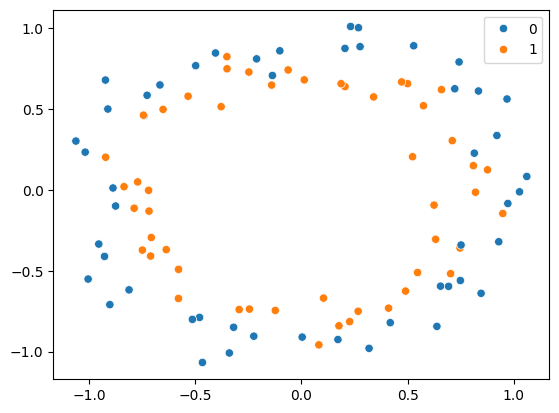

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))  # 1 hidden layer with 256 neurons
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

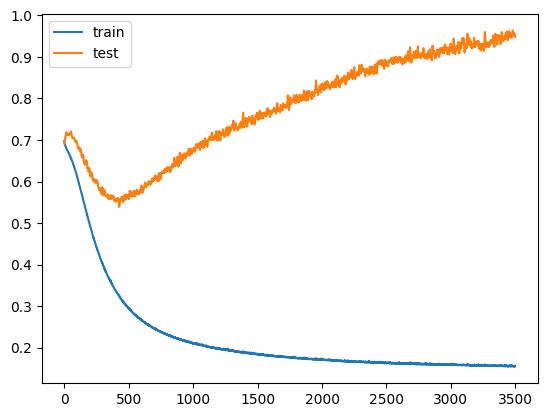

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


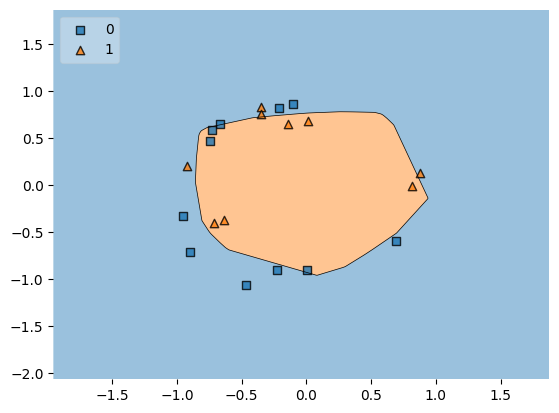

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=100,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

Here’s a detailed explanation of each parameter in the `EarlyStopping` callback constructor in Keras:

---

### 1. **`monitor`**
- **Definition**: The metric to monitor during training.
- **Default**: `"val_loss"`
- **Purpose**: Specifies which metric to observe for triggering early stopping. Common options:
  - `"val_loss"`: Validation loss.
  - `"val_accuracy"`: Validation accuracy.
  - Any other metric used in the model's `compile` step (e.g., `"loss"`, `"accuracy"`).

### 2. **`min_delta`**
- **Definition**: The minimum change in the monitored metric to qualify as an improvement.
- **Default**: `0`
- **Purpose**:
  - If the change in the monitored metric is less than `min_delta`, it is considered as no improvement.
  - **Example**: With `min_delta=0.00001`, an improvement smaller than \(0.00001\) in the monitored metric will be ignored.

### 3. **`patience`**
- **Definition**: Number of epochs with no improvement after which training will be stopped.
- **Default**: `0`
- **Purpose**:
  - Allows the model some epochs to improve after the first sign of no improvement.
  - **Example**: With `patience=20`, training will stop if no improvement occurs for 20 consecutive epochs.

### 4. **`verbose`**
- **Definition**: Verbosity mode.
- **Default**: `0` (silent)
- **Purpose**:
  - Controls the level of logging.
  - **Options**:
    - `0`: No messages.
    - `1`: Logs a message when early stopping is triggered.

### 5. **`mode`**
- **Definition**: Determines whether to minimize or maximize the monitored metric.
- **Default**: `"auto"`
- **Purpose**:
  - **Options**:
    - `"auto"`: Automatically infers the mode based on the monitored metric.
      - If the metric name contains `"acc"` (e.g., `"accuracy"`, `"val_accuracy"`), it maximizes.
      - Otherwise (e.g., `"loss"` or `"val_loss"`), it minimizes.
    - `"min"`: Stops training when the monitored metric stops decreasing.
    - `"max"`: Stops training when the monitored metric stops increasing.

### 6. **`baseline`**
- **Definition**: Baseline value for the monitored metric.
- **Default**: `None`
- **Purpose**:
  - If specified, training will stop if the monitored metric does not exceed this baseline value.
  - **Example**: If `baseline=0.8` and monitoring `"val_accuracy"`, training stops if validation accuracy does not reach \(0.8\).

### 7. **`restore_best_weights`**
- **Definition**: Whether to restore the model weights from the epoch with the best monitored metric value.
- **Default**: `False`
- **Purpose**:
  - If `True`, after early stopping, the model will revert to the weights that achieved the best monitored metric.
  - Prevents overfitting by using the best weights, not the weights from the last epoch.

---

### How It Works in Practice
When training a model, the `EarlyStopping` callback continuously monitors the specified metric. If the metric does not improve for a number of epochs specified by `patience`, training stops. Optionally, the model can revert to the best weights.

---

### Example Workflow

```python
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",        # Monitor validation loss
    min_delta=0.00001,         # Minimum improvement threshold
    patience=20,               # Wait for 20 epochs before stopping
    verbose=1,                 # Print early stopping message
    mode="auto",               # Automatically decide to minimize val_loss
    baseline=None,             # No specific baseline value
    restore_best_weights=True  # Revert to best weights after stopping
)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
```



In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5922 - loss: 0.6659 - val_accuracy: 0.4000 - val_loss: 0.7216
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5672 - loss: 0.6761 - val_accuracy: 0.4000 - val_loss: 0.7199
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5609 - loss: 0.6770 - val_accuracy: 0.4000 - val_loss: 0.7181
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5805 - loss: 0.6684 - val_accuracy: 0.4000 - val_loss: 0.7170
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6000 - loss: 0.6656 - val_accuracy: 0.4000 - val_loss: 0.7159
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5688 - loss: 0.6739 - val_accuracy: 0.4000 - val_loss: 0.7150
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5906 - loss: 0.6643 - val_accuracy: 0.4500 - val_loss: 0.7149
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5992 - loss: 0.6683 - val_accuracy: 0.4500 - v

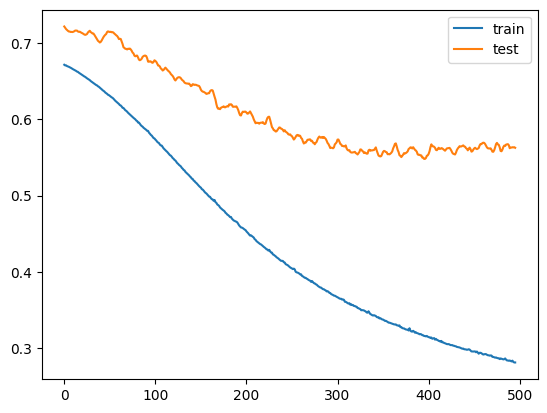

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


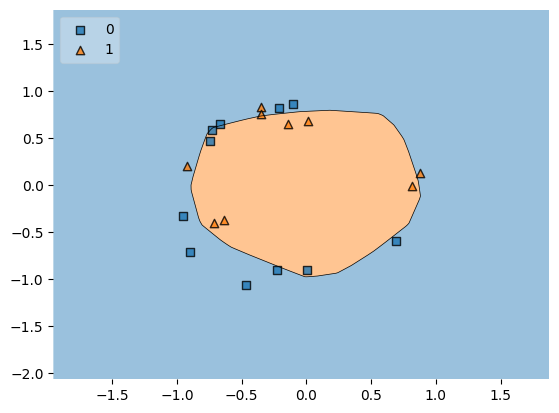

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()